In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [39]:
train_data=pd.read_csv("C:/Users/Rehaman shaik/Desktop/data science practice session/assisgments/svm/SalaryData_Train(1).csv")

train_data


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


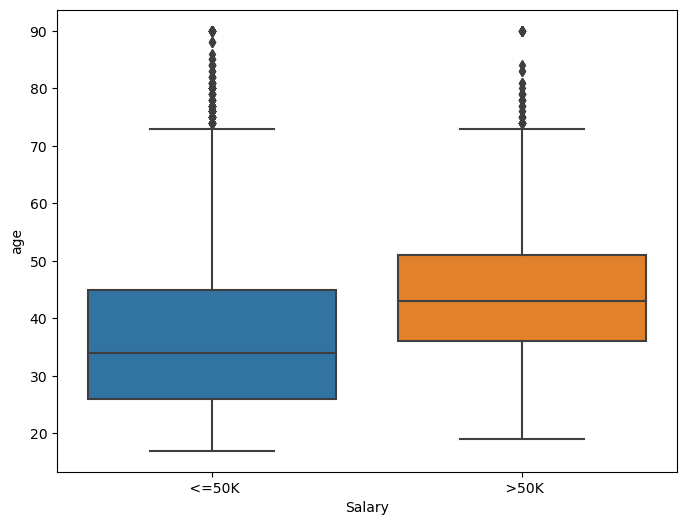

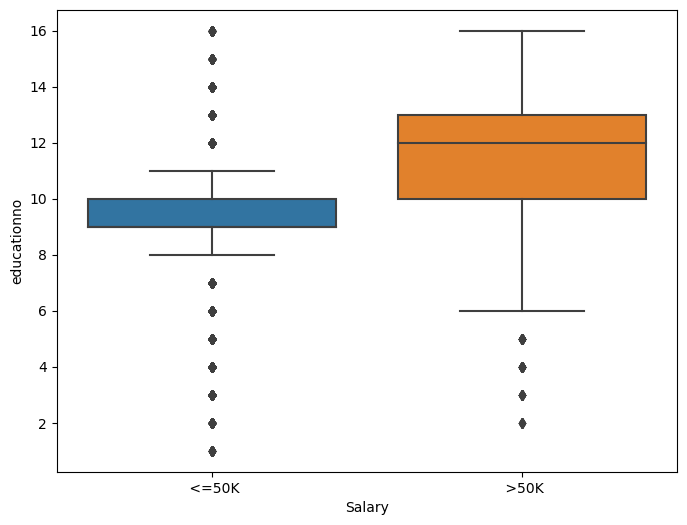

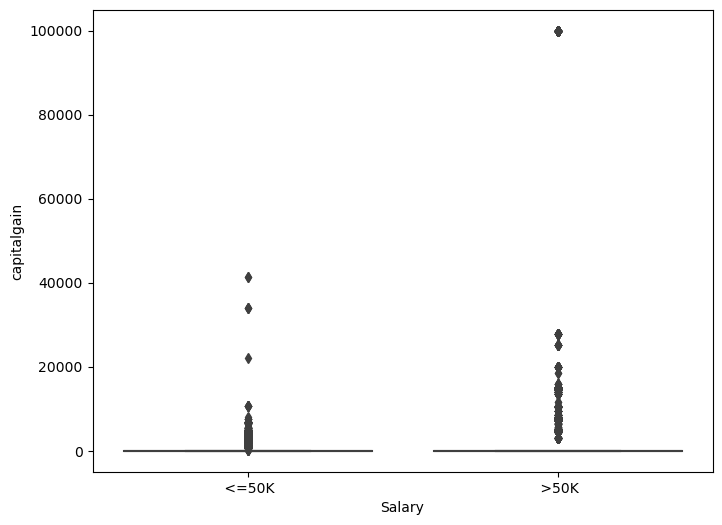

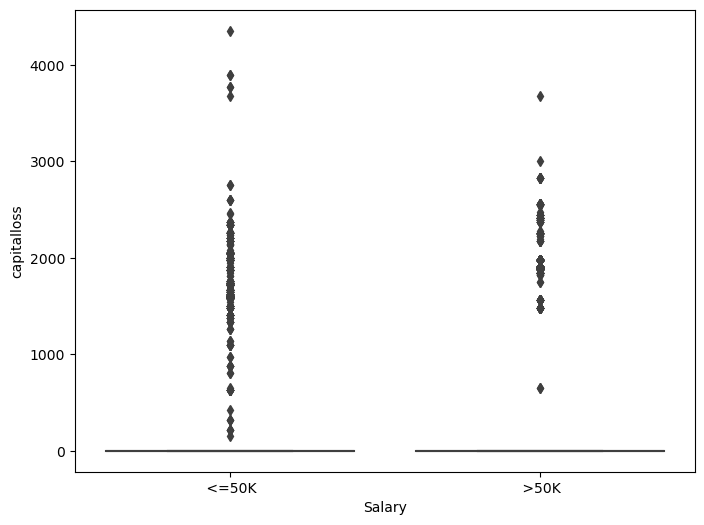

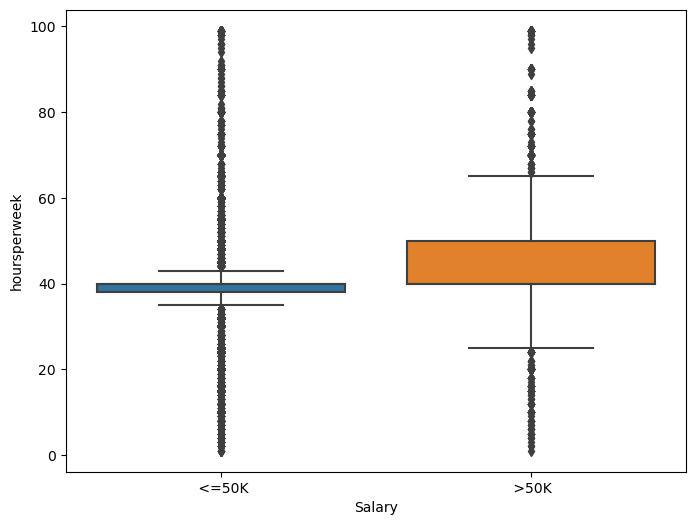

In [41]:
numerical_columns = train_data.select_dtypes(include='number').columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Salary', y=column, data=train_data)
    plt.show()

In [6]:
len(train_data)

30161

In [8]:
test_data=pd.read_csv("C:/Users/Rehaman shaik/Desktop/data science practice session/assisgments/svm/SalaryData_Test(1).csv")
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


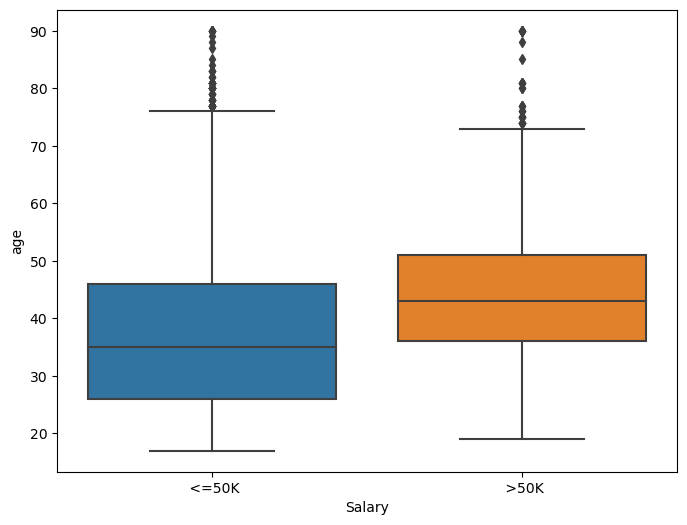

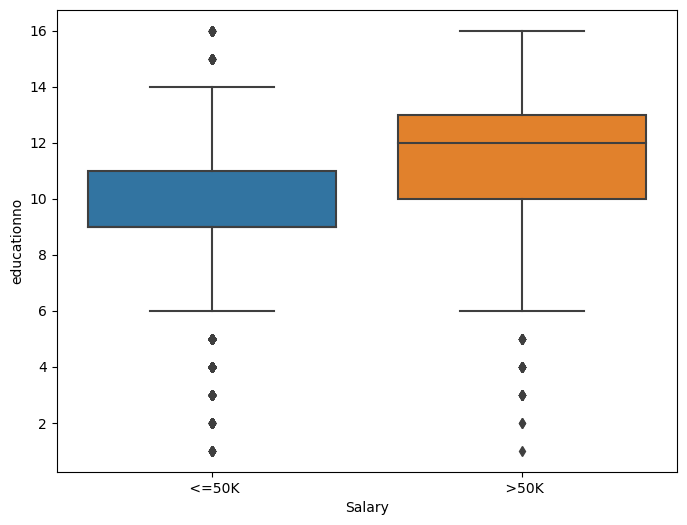

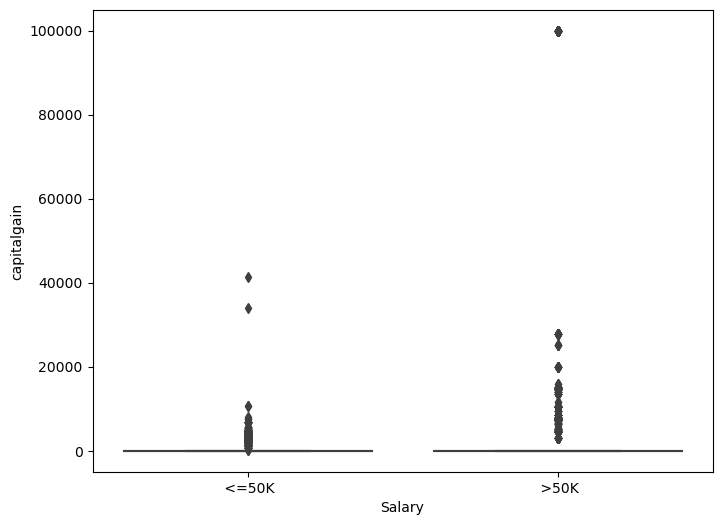

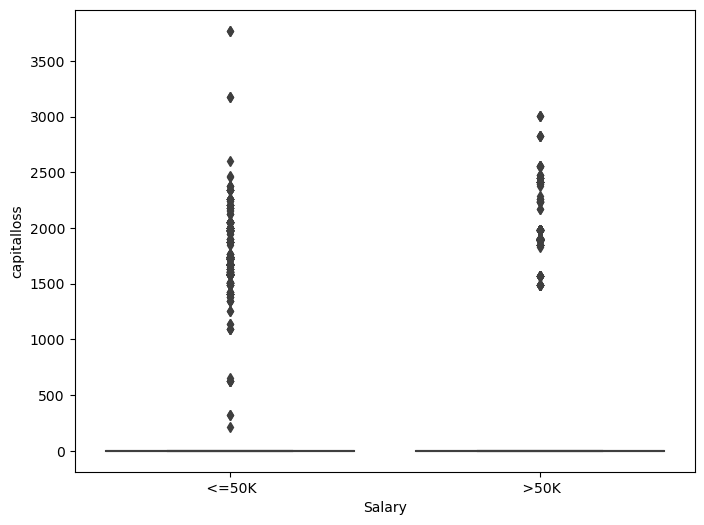

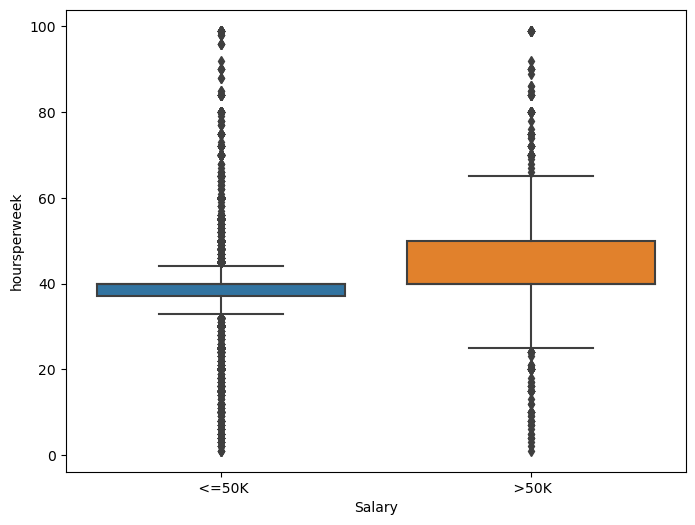

In [42]:
numerical_columns = test_data.select_dtypes(include='number').columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Salary', y=column, data=test_data)
    plt.show()

In [11]:

combined_Data=pd.concat([train_data,test_data])


0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
15059      >50K
Name: Salary, Length: 45221, dtype: object

In [12]:
combined_Data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [13]:
y=combined_Data["Salary"]
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
15059      >50K
Name: Salary, Length: 45221, dtype: object

In [16]:
x=combined_Data.drop("Salary",axis=1)
x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [17]:
for col in x.columns:
    if col in ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']:
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        x[col] = le.fit_transform(x[col])
    else:
        from sklearn.preprocessing import StandardScaler
        ss=StandardScaler()
        x[col]=ss.fit_transform(x[[col]])

In [18]:
x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.034190,5,9,1.128739,4,0,1,4,1,0.142884,-0.218728,-0.078121,37
1,0.866399,4,9,1.128739,2,3,0,4,1,-0.146735,-0.218728,-2.326714,37
2,-0.041466,2,11,-0.438118,0,5,1,4,1,-0.146735,-0.218728,-0.078121,37
3,1.093365,2,1,-1.221546,2,5,0,2,1,-0.146735,-0.218728,-0.078121,37
4,-0.798019,2,9,1.128739,2,9,5,2,0,-0.146735,-0.218728,-0.078121,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,-0.419742,2,9,1.128739,4,9,3,4,1,-0.146735,-0.218728,-0.078121,37
15056,0.034190,2,9,1.128739,0,9,1,4,0,-0.146735,-0.218728,-0.411246,37
15057,-0.041466,2,9,1.128739,2,9,0,4,1,-0.146735,-0.218728,0.754691,37
15058,0.412467,2,9,1.128739,0,0,3,1,1,0.579976,-0.218728,-0.078121,37


In [ ]:
#spliting train and test

In [20]:
x_train=x.iloc[:len(train_data)]
x_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.034190,5,9,1.128739,4,0,1,4,1,0.142884,-0.218728,-0.078121,37
1,0.866399,4,9,1.128739,2,3,0,4,1,-0.146735,-0.218728,-2.326714,37
2,-0.041466,2,11,-0.438118,0,5,1,4,1,-0.146735,-0.218728,-0.078121,37
3,1.093365,2,1,-1.221546,2,5,0,2,1,-0.146735,-0.218728,-0.078121,37
4,-0.798019,2,9,1.128739,2,9,5,2,0,-0.146735,-0.218728,-0.078121,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,-0.873675,2,7,0.737025,2,12,5,4,0,-0.146735,-0.218728,-0.244683,37
30157,0.109845,2,11,-0.438118,2,6,0,4,1,-0.146735,-0.218728,-0.078121,37
30158,1.471642,2,11,-0.438118,6,0,4,4,0,-0.146735,-0.218728,-0.078121,37
30159,-1.251951,2,11,-0.438118,4,0,3,4,1,-0.146735,-0.218728,-1.743746,37


In [22]:
x_test=x.iloc[len(train_data):]
x_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,-1.024985,2,1,-1.221546,4,6,3,2,1,-0.146735,-0.218728,-0.078121,37
1,-0.041466,2,11,-0.438118,2,4,0,4,1,-0.146735,-0.218728,0.754691,37
2,-0.798019,1,7,0.737025,2,10,0,4,1,-0.146735,-0.218728,-0.078121,37
3,0.412467,2,15,-0.046404,2,6,0,2,1,0.877454,-0.218728,-0.078121,37
4,-0.344087,2,0,-1.613261,4,7,1,4,1,-0.146735,-0.218728,-0.910933,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,-0.419742,2,9,1.128739,4,9,3,4,1,-0.146735,-0.218728,-0.078121,37
15056,0.034190,2,9,1.128739,0,9,1,4,0,-0.146735,-0.218728,-0.411246,37
15057,-0.041466,2,9,1.128739,2,9,0,4,1,-0.146735,-0.218728,0.754691,37
15058,0.412467,2,9,1.128739,0,0,3,1,1,0.579976,-0.218728,-0.078121,37


In [24]:
y_train=y.iloc[:len(train_data)]
y_train

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
30156     <=50K
30157      >50K
30158     <=50K
30159     <=50K
30160      >50K
Name: Salary, Length: 30161, dtype: object

In [25]:
y_test=y.iloc[len(train_data):]
y_test

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
15059      >50K
Name: Salary, Length: 15060, dtype: object

In [26]:
#importing svm algorithm


In [27]:
svc=SVC(C=1.0,kernel="linear")
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [28]:
y_pred_train=svc.predict(x_train)
y_pred_test=svc.predict(x_test)

In [29]:
print("training accuracy score: ",accuracy_score(y_train, y_pred_train))
print("testing accuracy score: ",accuracy_score(y_test, y_pred_test).round(3))

training accuracy score:  0.8104174264779019
testing accuracy score:  0.809


In [31]:
if accuracy_score(y_test, y_pred_test) > 0.8:
    print("The SVM model demonstrates a satisfactory level of accuracy on the testing set.")
    print("It appears to generalize well to new, unseen data.")
else:
    print("While the training accuracy is relatively high, the testing accuracy is slightly lower.")
    print("This could indicate a potential issue with overfitting or the need for model fine-tuning.")
    print("Consider adjusting hyperparameters or exploring other algorithms for further improvement.")


The SVM model demonstrates a satisfactory level of accuracy on the testing set.
It appears to generalize well to new, unseen data.
